<a href="https://colab.research.google.com/github/padibi4/cap-comp215/blob/main/project2_parking_lot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

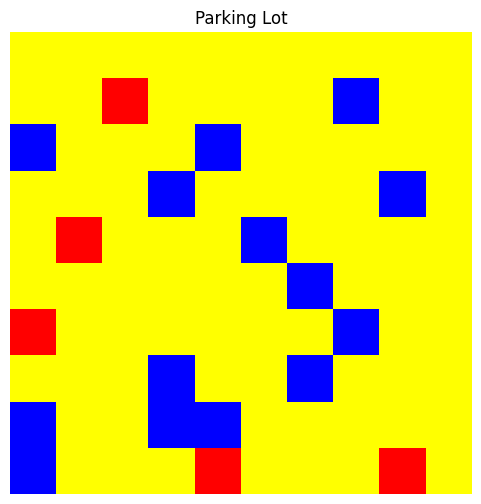

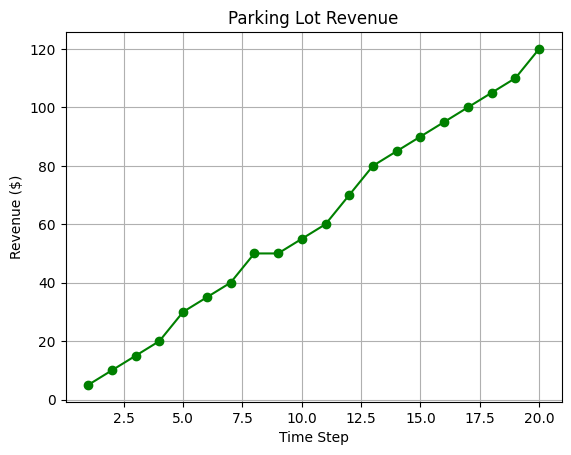

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from IPython.display import clear_output
import time

class Vehicle:
    def __init__(self, size, position, is_paid):
        self.size = size
        self.position = position
        self.is_paid = is_paid  # Indicates whether the parking is paid for
        self.status = "Parked"  # Initial status is parked

    def look_for_spot(self, parking_lot_state):
        # Randomly choose an empty spot to park
        empty_spots = np.argwhere(parking_lot_state == 0)
        if len(empty_spots) == 0:
            return None  # No empty spots available
        else:
            spot_index = np.random.randint(len(empty_spots))
            return tuple(empty_spots[spot_index])

    def update_status(self, new_position):
        if new_position is None:
            self.status = "No Parking Available"
        else:
            self.status = "Parked"

    def leave_spot(self):
        # Randomly move the vehicle to another spot within the parking lot
        new_x, new_y = np.random.randint(self.size), np.random.randint(self.size)
        self.position = (new_x, new_y)
        self.status = "Moving"

class ParkingLot:
    EMPTY = 0
    OCCUPIED_PAID = 1
    OCCUPIED_UNPAID = 2

    cmap = ListedColormap([(1, 1, 0), (0, 0, 1), (1, 0, 0)])  # Yellow for empty, navy blue for paid, red for unpaid

    def __init__(self, size):
        self.size = size
        self.state = np.zeros((size, size), dtype=int)  # Initialize all spots as empty
        self.vehicles = []  # List to keep track of vehicles
        self.revenue_history = []  # List to store revenue history

    def step(self):
        # Create a new vehicle and add it to the list
        is_paid = True if np.random.rand() < 0.7 else False  # 70% chance of being paid
        vehicle = Vehicle(size=self.size, position=(0, 0), is_paid=is_paid)
        self.vehicles.append(vehicle)

        # Look for a parking spot and update the state of the parking lot
        new_position = vehicle.look_for_spot(self.state)
        vehicle.update_status(new_position)
        if vehicle.status == "Parked":
            if vehicle.is_paid:
                self.state[new_position] = self.OCCUPIED_PAID
            else:
                self.state[new_position] = self.OCCUPIED_UNPAID

        # Calculate revenue
        navy_blue_count = np.sum(self.state == self.OCCUPIED_PAID)
        red_count = np.sum(self.state == self.OCCUPIED_UNPAID)
        total_revenue = navy_blue_count * 5 + red_count * 10
        self.revenue_history.append(total_revenue)

        # Check if any vehicles have been parked for a certain period and remove them
        for v in self.vehicles:
            if v.status == "Parked":
                v.leave_spot()
                self.state[v.position] = self.EMPTY
                self.vehicles.remove(v)

    def draw(self):
        # Display the parking lot with appropriate greeting message
        plt.figure(figsize=(6, 6))
        plt.imshow(self.state, cmap=self.cmap, interpolation='nearest', origin='upper')
        plt.title('Parking Lot')
        plt.axis('off')
        plt.show()

    def plot_revenue(self):
        plt.plot(range(1, len(self.revenue_history) + 1), self.revenue_history, marker='o', color='green')
        plt.title('Parking Lot Revenue')
        plt.xlabel('Time Step')
        plt.ylabel('Revenue ($)')
        plt.grid(True)
        plt.show()

# Initialize the parking lot
parking_lot_size = 10
parking_lot = ParkingLot(size=parking_lot_size)

# Run the simulation continuously and update the animation
for i in range(20):  # Run the simulation for 20 time steps
    parking_lot.step()
    clear_output(wait=True)
    parking_lot.draw()
    time.sleep(1)  # Add a delay to control the speed of the animation

# Plot the revenue graph
parking_lot.plot_revenue()

"""Created by Kunwar and Paniz"""